# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных
По первому взгляду можно сказать, что:
* Пропуски в данных отсутствуют.
* Нужно изменить тип данных у признаков 'Возраст' и 'Зарплата' на целочисленный.
* Необходимо поменять названия признаков на змеиный регистр.

In [2]:
# импортирование всех нужных библиотек и фуцнкций 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
# формирование датафрейма
df = pd.read_csv('dataset_insurance.csv', index_col=0)

# просмотр общей информации
display(df.head())
df.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 234.4 KB


## Предобработка данных



### Переименование столбцов

In [29]:
# приведение названий столбцов к змеиному регистру
df = df.rename(columns={'Пол':'gender', 
                        'Возраст':'age', 
                        'Зарплата':'income', 
                        'Члены семьи':'members_of_family', 
                        'Страховые выплаты':'insurance_payments'})

### Изменение типов данных

In [30]:
# изменение типов данных столбцов
df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(int)

# проверка внесенных изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   income              5000 non-null   int64
 3   members_of_family   5000 non-null   int64
 4   insurance_payments  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Равенство предсказаний до и после преобразований:
$$ a=a_{P} $$

$$ Xw=XPw_{P} $$

$$ X(X^TX)^{-1}X^Ty=XP((P^TX^T)(XP))^{-1}P^TX^Ty $$

$$ X(X^TX)^{-1}X^Ty=XP(P^T(X^TX)P)^{-1}P^TX^Ty $$

$$ X(X^TX)^{-1}X^Ty=XPP^{-1}(P^T(X^TX))^{-1}P^TX^Ty $$

$$ X(X^TX)^{-1}X^Ty=XPP^{-1}(X^TX)^{-1}P^{T-1}P^TX^Ty $$

$$ X(X^TX)^{-1}X^Ty=XE(X^TX)^{-1}EX^Ty $$

$$ X(X^TX)^{-1}X^Ty=X(X^TX)^{-1}X^Ty $$

$$ Xw=Xw $$

### Выделение признаков 

In [31]:
# формирование обучающей и тестовой выборок
df_train, df_test = train_test_split(df, test_size=0.25, random_state=144)

# выделение признаков и целевого признака в обучающей выборке
features_train = df_train.drop(['insurance_payments'], axis=1)
target_train = df_train['insurance_payments']

# выделение признаков и целевого признака в тестовой выборке
features_test = df_test.drop(['insurance_payments'], axis=1)
target_test = df_test['insurance_payments']

### Умножение признаков на обратимую матрицу
Сформируем случайную обратимую матрицу. <br>
Метод 'linalg.inv' не выдает ошибку, значит обратная матрица к случайной существует.

In [32]:
# объект RandomState
r = np.random.RandomState(144)

# случайная матрица
matrix = r.randint(10, size=(4, 4))

# проверка матрицы на обратимость
display(np.linalg.inv(matrix))

# умножение признаков на обратимую матрицу
new_features_train = np.dot(features_train.values, matrix)
new_features_test = np.dot(features_test.values, matrix)

array([[-3.12500000e-02,  2.44902138e-18, -1.56250000e-01,
         1.71875000e-01],
       [-4.68750000e-02, -3.26536184e-18,  2.65625000e-01,
         7.81250000e-03],
       [ 2.28125000e-01, -2.00000000e-01, -1.59375000e-01,
        -1.04687500e-01],
       [ 3.75000000e-02,  2.00000000e-01, -1.25000000e-02,
        -1.06250000e-01]])

### Проверка изменения качества 
Метрики имеют незначительные отличия.

In [33]:
# модель 'линейная регрессия'
model = LinearRegression()

# обучение модели и ее оценка качества на признаках
model.fit(features_train, target_train)
pred = model.predict(features_test)
display(r2_score(target_test, pred))
display(mean_squared_error(target_test, pred))

# обучение модели и ее оценка качества на умноженных признаках
model.fit(new_features_train, target_train)
pred = model.predict(new_features_test)
display(r2_score(target_test, pred))
display(mean_squared_error(target_test, pred))

0.37987479699541726

0.10938175132728002

0.3798747969954147

0.10938175132728047

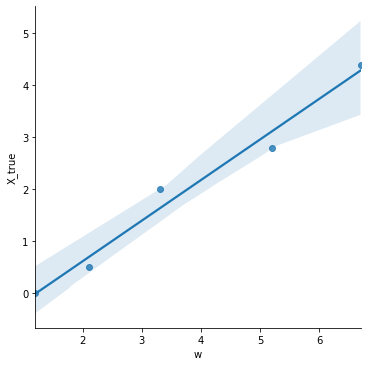

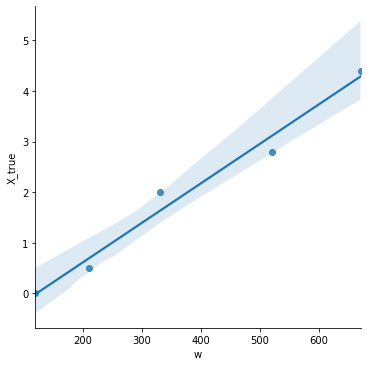

In [34]:
# формирование датафреймов для визуализации
data_example_0 = pd.DataFrame(data={'X_true': [0, 0.5, 2, 2.8, 4.4], 'w': [1.2, 2.1, 3.3, 5.2, 6.7]})
data_example_1 = data_example_0.copy(deep=True)

# умножение признака второго датафрейма на константу
const = 100
data_example_1['w'] = data_example_1['w'] * const

# визуализация формирования предсказаний линейной регрессии в двух случаях
f = sns.lmplot(data=data_example_0, x='w', y='X_true')
g = sns.lmplot(data=data_example_1, x='w', y='X_true')

**Ответ:** Качество линейной регрессии при умножении признаков на обратимую матрицу не изменится.

**Обоснование:** Не изменится, так как предсказания формируются из произведения матрицы признаков и вектора весов. Если визуализировать линейную регрессию с одним признаком с помощью графика, то становится видно, что при умножении признака на константу (в случае с одним признаком) и последующим обучении, модель не теряет свое качество.

Функция предсказаний в первом случае:
$$
a = Xw,
$$
где X - матрица признаков, w - вектор весов.

Функция предсказаний во втором случае (с умножением матрицы признаков на случайную матрицу):
$$
a = XAw,
$$
где А - случайная обратимая матрица (константа).

## Алгоритм преобразования

In [35]:
# класс преобразования
class Scaler:
    # функция преобразования данных
    def transform(self, features):
        # сохранение наименований признаков 
        self.columns = features.columns
        
        # формирование случайной матрицы со значениями близкими к нулю с проверкой на обратимость в цикле
        r = np.random.RandomState(1)
        det = 0
        while det == 0:
            self.matrix = r.uniform(10**(-6), 10**(-5), size=(4, 4))
            det = np.linalg.det(self.matrix)
        
        return np.dot(features.values, self.matrix)
    
    # функция обратного преобразования данных
    def inv_transform(self, transformed_features):
        self.data = pd.DataFrame(np.dot(transformed_features, np.linalg.inv(self.matrix))).apply(round).astype(int)
        
        # подгрузка наименований признаков
        self.data.columns = self.columns
        return self.data

# объект преобразования
scaler = Scaler()

# умножение матриц признаков на случайную матрицу 
new_features_train = scaler.transform(features_train)
new_features_test = scaler.transform(features_test)

**Алгоритм**

Умножение матрицы признаков на случайную обратимую матрицу со значениями очень близкими к нулю. <br>
Для возвращения признаков к нормальному виду необходимо умножить измененную матрицу признаков на обратную к случайной матрице.

**Обоснование**

Как было доказано выше, при умножении матрицы признаков на случайную матрицу, качество линейной регрессии не изменится. Поэтому, если умножить матрицу признаков на матрицу со значениями очень близкими к нулю, то признаки перестануть быть распознаваемыми, что защитит данные клиентов компании.

## Проверка алгоритма

Признаки стали не распознаваемыми после умножения.

In [36]:
# проверка умноженных признаков на распознаваемость
display(new_features_train)
display(new_features_test)

array([[0.22818277, 0.29198087, 0.23825867, 0.35780075],
       [0.15136316, 0.19368274, 0.15804577, 0.23734332],
       [0.16969078, 0.21711111, 0.17719198, 0.26609381],
       ...,
       [0.0819207 , 0.10480715, 0.08553868, 0.12846987],
       [0.14174454, 0.18136649, 0.1480088 , 0.22225844],
       [0.18749318, 0.23989494, 0.19577745, 0.29399357]])

array([[0.16187974, 0.20712194, 0.16903566, 0.25383423],
       [0.19798631, 0.25334229, 0.20673218, 0.31045097],
       [0.14815053, 0.18958753, 0.15469028, 0.23231212],
       ...,
       [0.17603342, 0.22524593, 0.1838081 , 0.27601859],
       [0.28664514, 0.36679981, 0.29930624, 0.4494586 ],
       [0.26888602, 0.34404426, 0.28076577, 0.42162209]])

In [37]:
# приведение признаков к нормальному виду 
display(features_train.head())
display(scaler.inv_transform(new_features_train).head())

,gender,age,income,members_of_family
2687,1,35,49900,3
3361,1,24,33100,2
4906,0,45,37100,2
1286,1,42,60500,2
79,1,29,52500,3


,gender,age,income,members_of_family
0,1,35,49900,3
1,1,24,33100,2
2,0,45,37100,2
3,1,42,60500,2
4,1,29,52500,3


### Сравнение метрик качества

Изменение метрики качества после преобразование признаков несущественно, значит алгоритм работает исправно.

In [38]:
# модель 'линейная регрессия'
model = LinearRegression()

# обучение и проверка качества модели на признаках в обычном виде
model.fit(features_train, target_train)
pred = model.predict(features_test)
display(r2_score(target_test, pred))

# обучение и проверка качества модели на признаках в преобразованном виде
model.fit(new_features_train, target_train)
pred = model.predict(new_features_test)
display(r2_score(target_test, pred))

0.37987479699541726

0.37987479698456783

## Вывод

* Изменили типы данных в столбцах, привели названия столбцов к змеиному регистру.
* Выделили признаки, умножили матрицу признаков на случайную обратимую матрицу, проверили изменение метрик качества: с помощью графиков показали почему качество не изменилось.
* Привели алгоритм преобразования для защиты данных клиентов компании, создали класс и написали две функции для преобразования и обратного преобразования данных.
* Проверили алгоритм на имеющихся данных.